# Resevoir computing for the quartic Hamiltonian
# Results

In this notebook show the results of solving the time-dependent Schrödinger equation

$$
i \hbar \frac{d \psi(x,y,t)}{dt} = \hat{H} \psi(x,y,t)
$$

for the quartic oscillator system. That is, the Hamiltonian $\hat{H}$ is:

$$
H(x,y,p_x,p_y) = \frac{p_x^2 + p_y^2}{2m} + \frac{x^2y^2}{2} + \frac{1}{400}(x^4 + y^4)
$$

Starting from an initial wavefunction $\psi_0(x)$, we propagate the wavepacket in time. In order to do so, we use a machine learning technique called Reservoir Computing.

In this notebook we provide the results of the wavefunctions for different energies, compared with the results obtained with the variational method. We also provide the scars functions obtained for different periodic orbits.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker, cm

import scipy.linalg
from scipy.sparse import random
from scipy.sparse.linalg import eigs
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import mean_squared_error
from skimage.measure import block_reduce

import plotly
from plotly.graph_objs import graph_objs as go
from plotly.subplots import make_subplots
import plotly.offline as pyo
pyo.init_notebook_mode()


## Wavefunctions

### E=1

Mean squared error Reservoir computing.

Train: 1.25e-08

Test: 2.05e-06

In [3]:
with open('../results/wavefunctions/psi_quarticE1_I_true.npy', 'rb') as f:
    I_true_mod = np.load(f)
    
with open('../results/wavefunctions/psi_quarticE1_I_pred.npy', 'rb') as f:
    I_pred_mod = np.load(f)
Emin, Emax, dE=0,5,0.00001

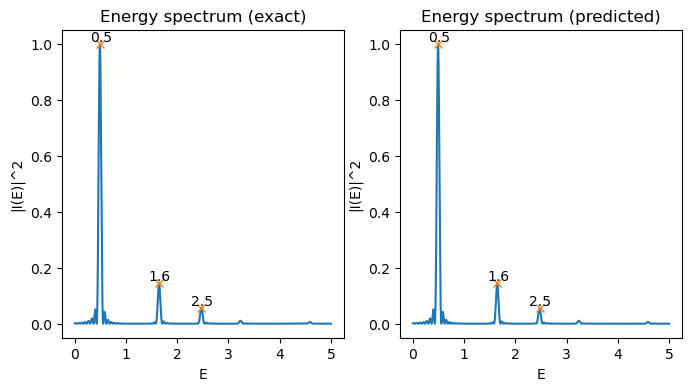

Theoretical energies =  [0.49128 1.64606 2.47275]
Predicted energies =  [0.4913  1.64606 2.47277]
MSE energies =  [4.e-10 0.e+00 4.e-10]


In [4]:
# @hidden

from scipy.signal import find_peaks

peaks_true, _ = find_peaks(I_true_mod, height=0.052)

peaks_pred, _ = find_peaks(I_pred_mod, height=0.052)
E = np.arange(Emin, Emax, dE)

# PLOT
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4))
ax1.plot(E,I_true_mod)
ax1.plot(E[peaks_true], I_true_mod[peaks_true], "x")
ax1.set_title("Energy spectrum (exact)")
ax1.set_xlabel("E")
ax1.set_ylabel("|I(E)|^2")

for i in range(peaks_true.shape[0]):
    ax1.text(E[peaks_true][i]-0.2, I_true_mod[peaks_true][i]+0.01,
             round(E[peaks_true][i],1), fontsize=10)

ax2.plot(E,I_pred_mod)
ax2.plot(E[peaks_pred], I_pred_mod[peaks_pred], "x")
ax2.set_title("Energy spectrum (predicted)")
ax2.set_xlabel("E")
ax2.set_ylabel("|I(E)|^2")
for i in range(peaks_pred.shape[0]):
    ax2.text(E[peaks_pred][i]-0.2, I_true_mod[peaks_pred][i]+0.01,
             round(E[peaks_pred][i],1), fontsize=10)
plt.show()

En = E[peaks_pred]
En_true = E[peaks_true]
print('Theoretical energies = ', En_true)
print('Predicted energies = ', En)
print('MSE energies = ', np.square(En_true - En))

In [5]:
with open('../results/wavefunctions/waves_quarticE1_predicted.npy', 'rb') as f:
            waves= np.load(f)
        
with open('../results/wavefunctions/waves_quarticE1_exact.npy', 'rb') as f:
            waves_true= np.load(f)

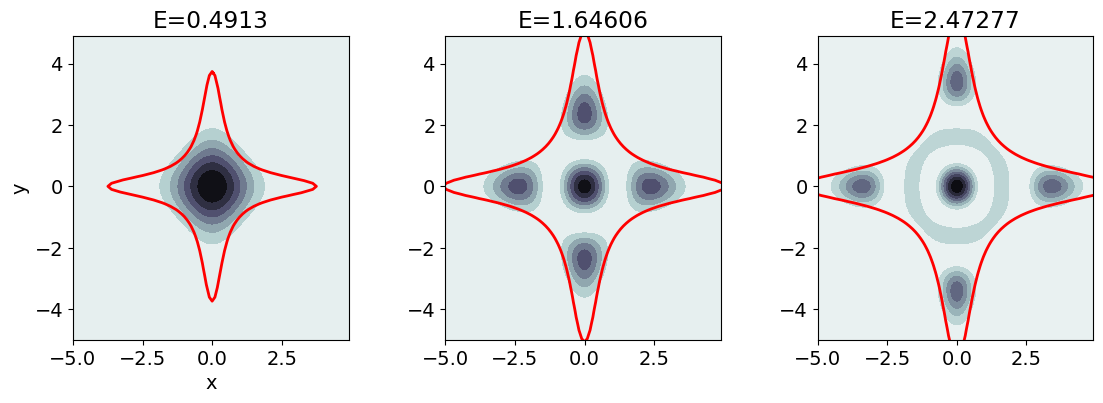

In [6]:
from skimage.measure import find_contours
row = 1
col = 3
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(row,col, figsize=(12,5))

dx = 0.1
dy = 0.1
xmin=-5
xmax=5
ymin=-5
ymax=5
x = np.arange(xmin,xmax, dx)
y = np.arange(ymin,ymax,  dx)
h1 = (x[-1] - x[0])/x.shape[0]
h2 = (y[-1] - y[0])/y.shape[0]
x_grid, y_grid = np.meshgrid(x, y, copy=False)
epsilon = 0.01
V_red = 1/2*x_grid**2*y_grid**2 + epsilon/4*(x_grid**4 + y_grid**4)
for k in range(En.shape[0]):
    i = int(k/col)
    j = k%col
    C = 1/np.sqrt(np.sum(np.real(waves_true[k])*np.real(waves_true[k])*h1*h2))
    phi = C*np.real(waves_true[k])
    cmap_reversed = plt.cm.get_cmap('bone_r')       
    cb = ax[j].contourf(x,y,phi**2, cmap=cmap_reversed)
    #plt.colorbar(cb, ax = ax[j])
    ax[j].set_title("E={}".format(round(En[k],5)))
    
    # Contour plot
    contours = find_contours(V_red, En[k])
    for contour in contours:
        Nx = x.shape[0]
        contour = (xmax-xmin)/Nx*contour + xmin
        ax[j].plot(contour[:, 1], contour[:, 0], color='red', linewidth=2)
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
plt.tight_layout(pad=3)
plt.show()


In [7]:
print('Mean squared error wavefunctions:')
true_waves = waves_true**2
phi2 = np.conjugate(waves)*waves
mse_scars = []  
for k in range(En.shape[0]):
    mse_scars.append(np.real(np.mean(np.conjugate(phi2[k] - true_waves[k])*(phi2[k] - true_waves[k]))))
mse_scars

Mean squared error wavefunctions:


[4.932722132725911e-07, 3.8751896460829975e-07, 1.301200514515958e-05]

### E=10

Mean squared error Reservoir computing.

Train: 4.67e-08

Test: 6.87e-06

In [8]:
with open('../results/wavefunctions/psi_quarticE10_I_true.npy', 'rb') as f:
    I_true_mod = np.load(f)
    
with open('../results/wavefunctions/psi_quarticE10_I_pred.npy', 'rb') as f:
    I_pred_mod = np.load(f)
Emin, Emax, dE=0,20,0.0001

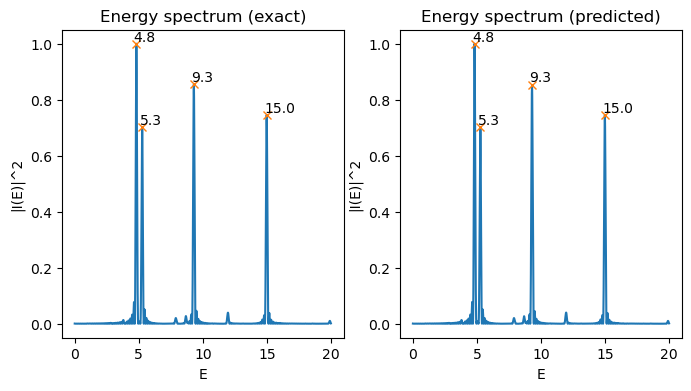

Theoretical energies =  [ 4.8133  5.2648  9.299  14.9847]
Predicted energies =  [ 4.8133  5.2648  9.2991 14.9848]
MSE energies =  [0.e+00 0.e+00 1.e-08 1.e-08]


In [9]:
# @hidden

from scipy.signal import find_peaks
plt.rcParams.update({'font.size': 10})
peaks_true, _ = find_peaks(I_true_mod, height=0.3)

peaks_pred, _ = find_peaks(I_pred_mod, height=0.3)
E = np.arange(Emin, Emax, dE)

# PLOT
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4))
ax1.plot(E,I_true_mod)
ax1.plot(E[peaks_true], I_true_mod[peaks_true], "x")
ax1.set_title("Energy spectrum (exact)")
ax1.set_xlabel("E")
ax1.set_ylabel("|I(E)|^2")

for i in range(peaks_true.shape[0]):
    ax1.text(E[peaks_true][i]-0.2, I_true_mod[peaks_true][i]+0.01,
             round(E[peaks_true][i],1), fontsize=10)

ax2.plot(E,I_pred_mod)
ax2.plot(E[peaks_pred], I_pred_mod[peaks_pred], "x")
ax2.set_title("Energy spectrum (predicted)")
ax2.set_xlabel("E")
ax2.set_ylabel("|I(E)|^2")
for i in range(peaks_pred.shape[0]):
    ax2.text(E[peaks_pred][i]-0.2, I_true_mod[peaks_pred][i]+0.01,
             round(E[peaks_pred][i],1), fontsize=10)
plt.show()

En = E[peaks_pred]
En_true = E[peaks_true]
print('Theoretical energies = ', En_true)
print('Predicted energies = ', En)
print('MSE energies = ', np.square(En_true - En))

In [10]:
with open('../results/wavefunctions/waves_quarticE10_predicted.npy', 'rb') as f:
            waves= np.load(f)
        
with open('../results/wavefunctions/waves_quarticE10_exact.npy', 'rb') as f:
            waves_true= np.load(f)

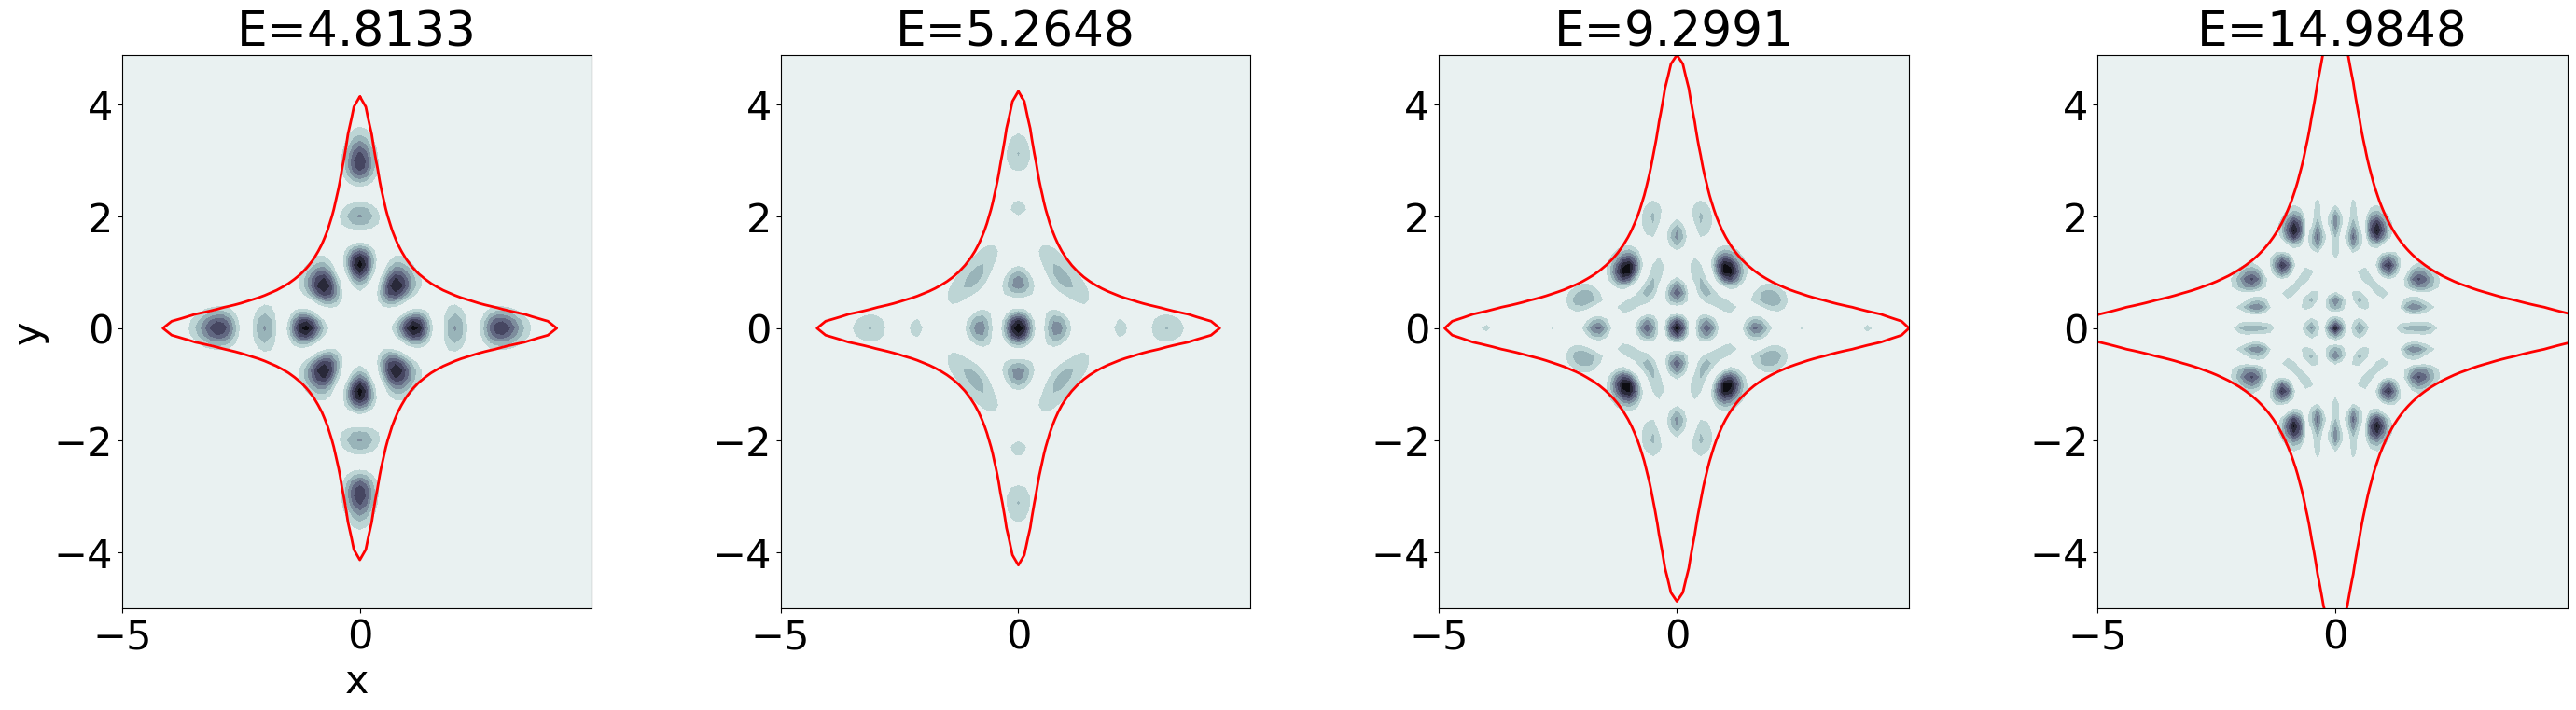

In [11]:
from skimage.measure import find_contours
row = 1
col = 4
plt.rcParams.update({'font.size': 31})
fig, ax = plt.subplots(row,col, figsize=(30,10))

dx = 0.1*2
dy = 0.1*2
xmin=-8
xmax=8
ymin=-8
ymax=8
x = np.arange(xmin,xmax, dx)
y = np.arange(ymin,ymax,  dx)
h1 = (x[-1] - x[0])/x.shape[0]
h2 = (y[-1] - y[0])/y.shape[0]
x_grid, y_grid = np.meshgrid(x, y, copy=False)
x_grid2 = x_grid/8*5
y_grid2 = y_grid/8*5
epsilon = 0.01
V_red = 1/2*x_grid**2*y_grid**2 + epsilon/4*(x_grid**4 + y_grid**4)
for k in range(En.shape[0]):
    i = int(k/col)
    j = k%col
    C = 1/np.sqrt(np.sum(np.real(waves_true[k])*np.real(waves_true[k])*h1*h2))
    phi = C*np.real(waves_true[k])
    cmap_reversed = plt.cm.get_cmap('bone_r')       
    cb = ax[j].contourf(x_grid2,y_grid2,phi**2, cmap=cmap_reversed)
    #plt.colorbar(cb, ax = ax[j])
    ax[j].set_title("E={}".format(round(En[k],5)))
    
    # Contour plot
    contours = find_contours(V_red, En[k])
    for contour in contours:
        Nx = x.shape[0]
        xmax, xmin=5,-5
        contour = (xmax-xmin)/Nx*contour + xmin
        ax[j].plot(contour[:, 1], contour[:, 0], color='red', linewidth=2)

ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
plt.tight_layout(pad=3)
plt.show()


In [12]:
print('Mean squared error wavefunctions:')
true_waves = waves_true**2
phi2 = np.conjugate(waves)*waves
mse_scars = []  
for k in range(En.shape[0]):
    mse_scars.append(np.real(np.mean(np.conjugate(phi2[k] - true_waves[k])*(phi2[k] - true_waves[k]))))
mse_scars

Mean squared error wavefunctions:


[5.6038435852436444e-06,
 6.7863368285764075e-06,
 9.316712368114896e-06,
 1.9703498880511403e-05]

### E=100

Mean squared error Reservoir computing.

Train: 2.73e-05

Test: 2.75e-04

In [13]:
with open('../results/wavefunctions/psi_quarticE100_I_true.npy', 'rb') as f:
    I_true_mod = np.load(f)
    
with open('../results/wavefunctions/psi_quarticE100_I_pred.npy', 'rb') as f:
    I_pred_mod = np.load(f)
Emin, Emax, dE=0,120,0.0001

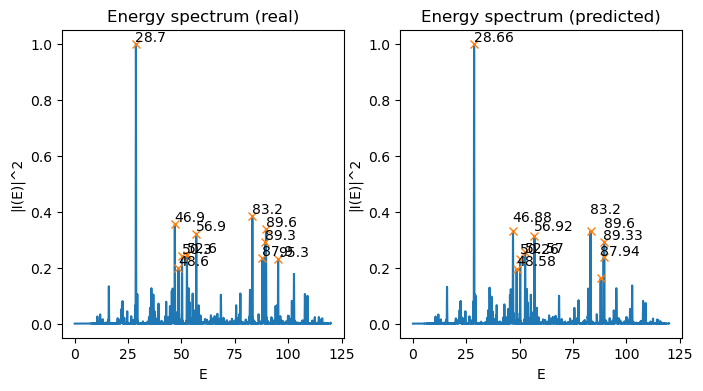

Theoretical energies =  [28.6643 46.8794 48.5846 50.2605 52.5642 56.9221 83.1969 87.9381 89.3304
 89.5899]
Predicted energies =  [28.6641 46.8783 48.5821 50.2597 52.5701 56.924  83.2003 87.9378 89.3349
 89.5994]
MSE energies =  [4.000e-08 1.210e-06 6.250e-06 6.400e-07 3.481e-05 3.610e-06 1.156e-05
 9.000e-08 2.025e-05 9.025e-05]


In [14]:
# @hidden
plt.rcParams.update({'font.size': 10})
from scipy.signal import find_peaks

peaks_true, _ = find_peaks(I_true_mod, height=0.18)

peaks_pred, _ = find_peaks(I_pred_mod, height=0.14)
E = np.arange(Emin, Emax, dE)

# PLOT
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4))
ax1.plot(E,I_true_mod)
ax1.plot(E[peaks_true], I_true_mod[peaks_true], "x")
ax1.set_title("Energy spectrum (real)")
ax1.set_xlabel("E")
ax1.set_ylabel("|I(E)|^2")

for i in range(peaks_true.shape[0]):
    ax1.text(E[peaks_true][i]-0.2, I_true_mod[peaks_true][i]+0.01,
             round(E[peaks_true][i],1), fontsize=10)

ax2.plot(E,I_pred_mod)
ax2.plot(E[peaks_pred], I_pred_mod[peaks_pred], "x")
ax2.set_title("Energy spectrum (predicted)")
ax2.set_xlabel("E")
ax2.set_ylabel("|I(E)|^2")
for i in range(peaks_pred.shape[0]):
    ax2.text(E[peaks_pred][i]-0.2, I_true_mod[peaks_pred][i]+0.01,
             round(E[peaks_pred][i],2), fontsize=10)
plt.show()

En = E[peaks_pred]#[:7]
En_true = E[peaks_true][[0,1,2,3,4,5,6,7,8,9]]
print('Theoretical energies = ', En_true)
print('Predicted energies = ', En)
print('MSE energies = ', np.square(En_true - En))

In [15]:
with open('../results/wavefunctions/waves_quarticE100_predicted.npy', 'rb') as f:
            waves= np.load(f)
        
with open('../results/wavefunctions/waves_quarticE100_true.npy', 'rb') as f:
            waves_true= np.load(f)

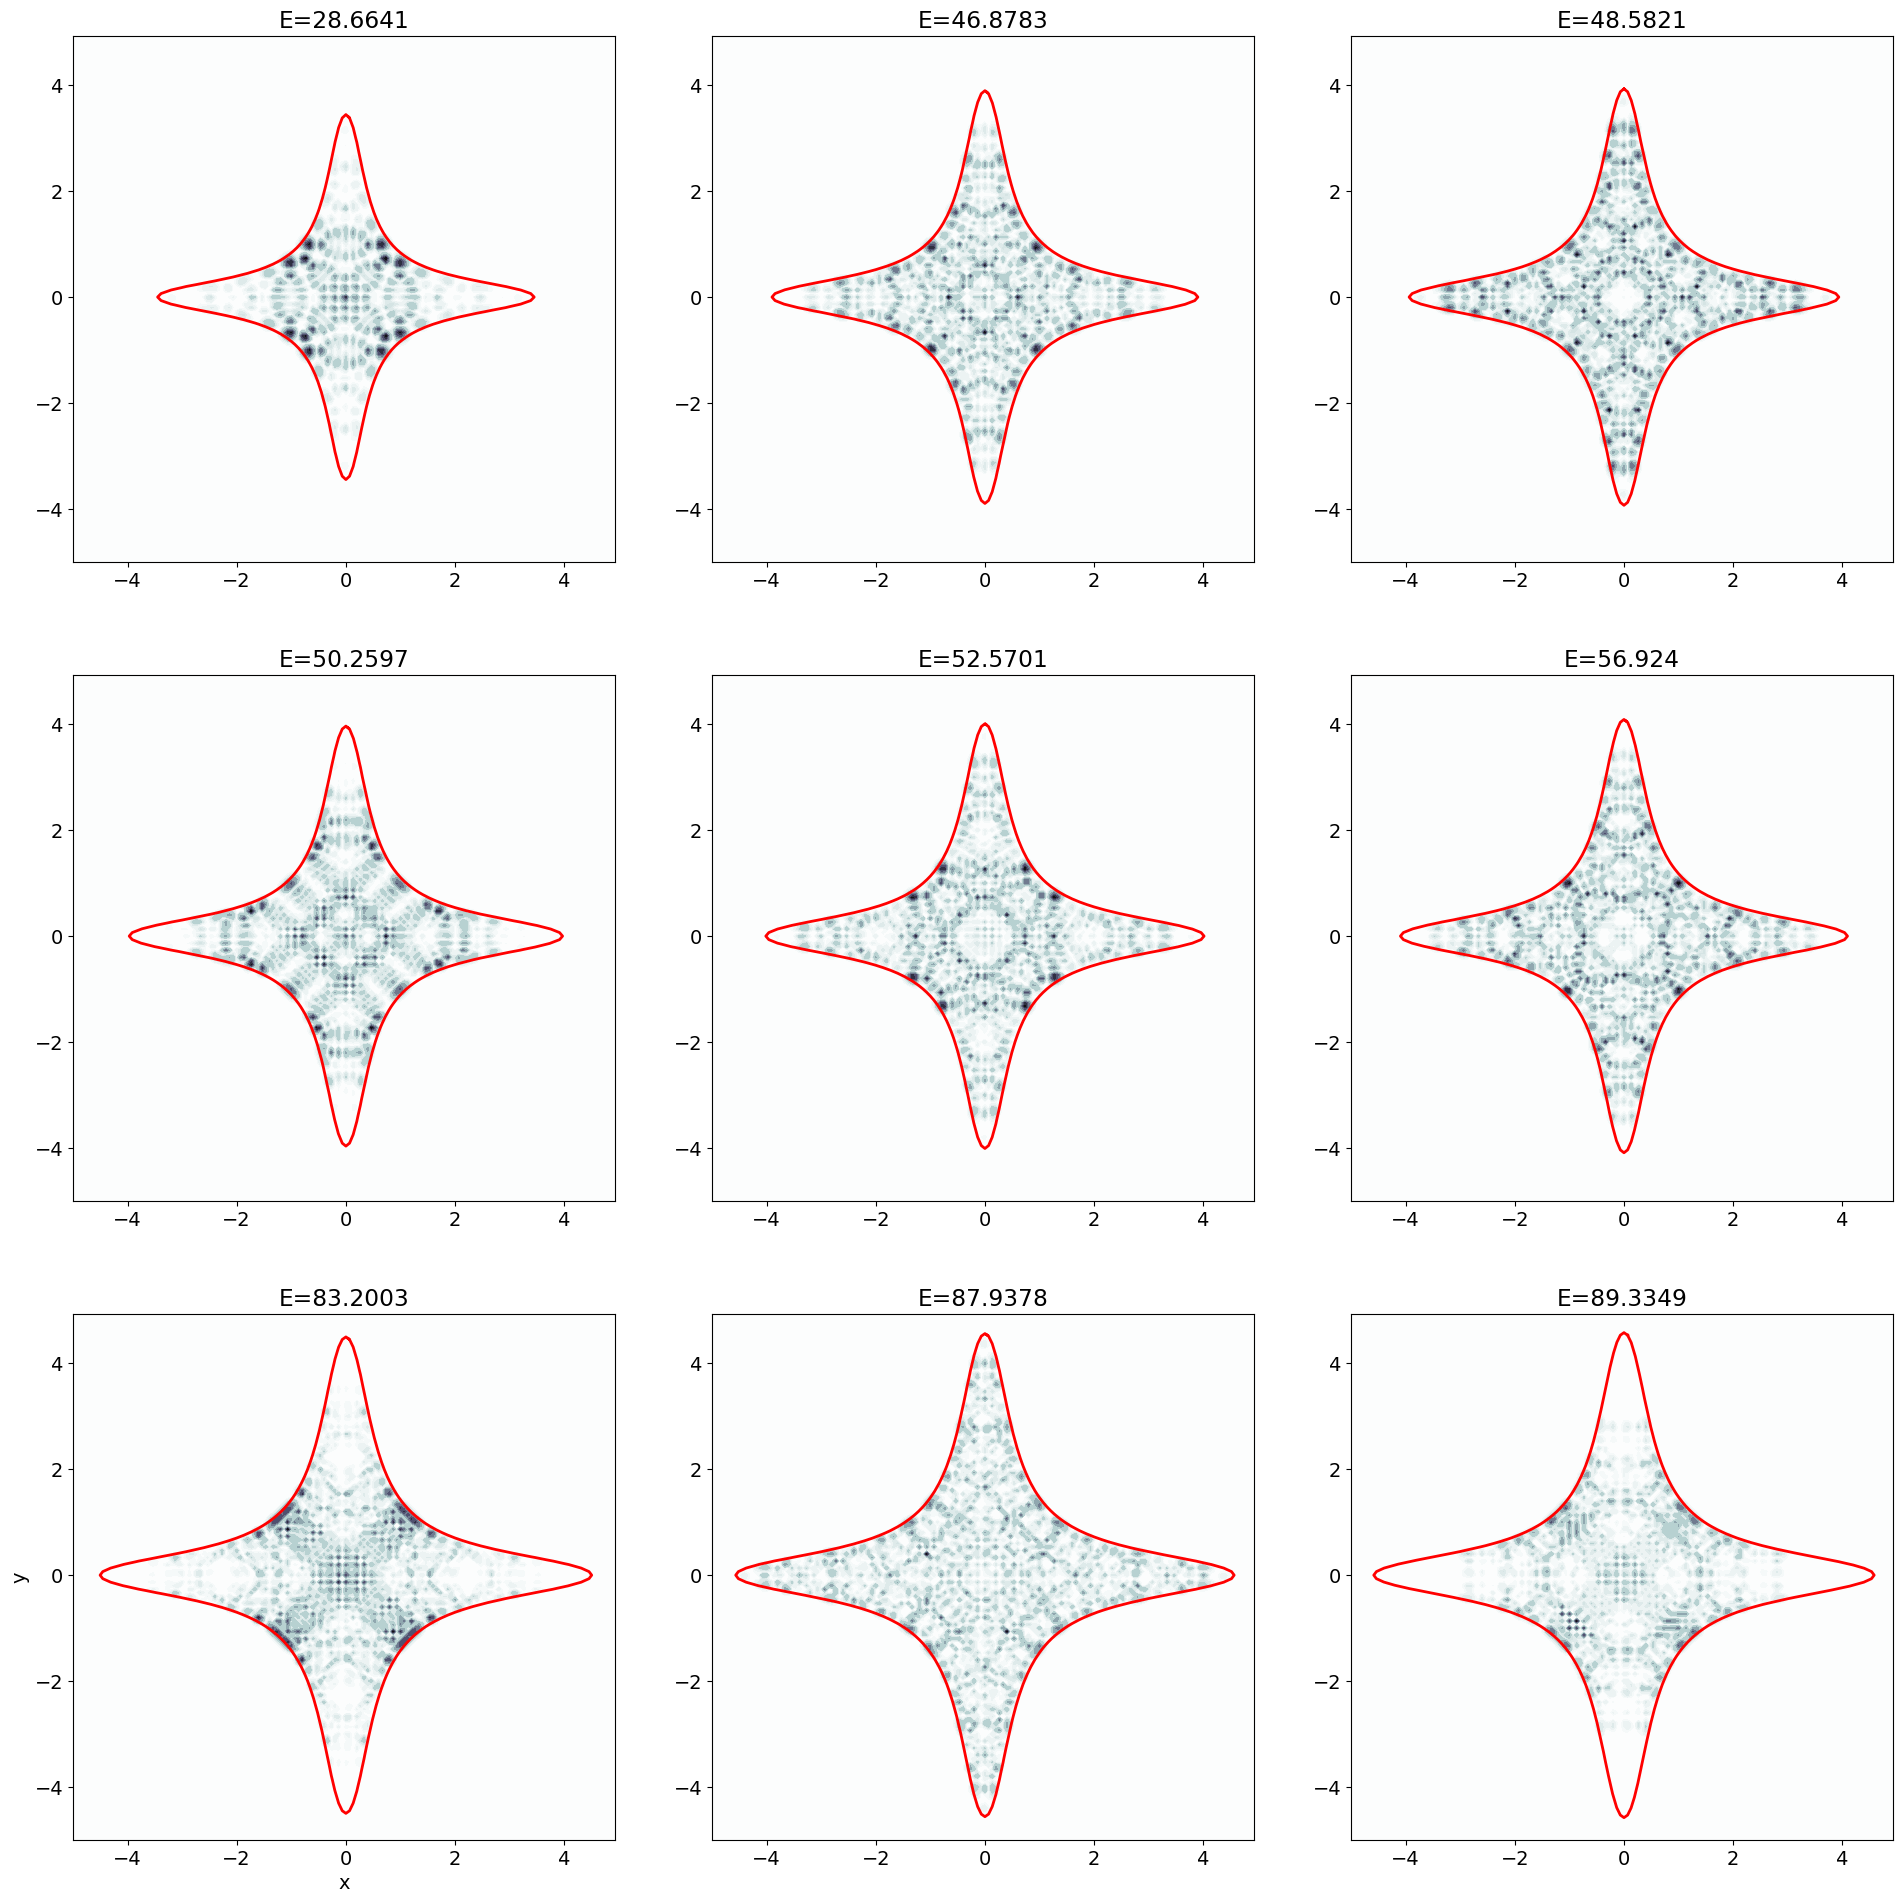

In [16]:
from skimage.measure import find_contours
row = 3
col = 3
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(row,col, figsize=(20,20))

dx = 0.2
dy = 0.2
xmin=-15
xmax=15
ymin=-15
ymax=15
x = np.arange(xmin,xmax, dx)
y = np.arange(ymin,ymax,  dx)
h1 = (x[-1] - x[0])/x.shape[0]
h2 = (y[-1] - y[0])/y.shape[0]
x_grid, y_grid = np.meshgrid(x, y, copy=False)
x_grid2 = x_grid/15*5
y_grid2 = y_grid/15*5
epsilon = 0.01
V_red = 1/2*x_grid**2*y_grid**2 + epsilon/4*(x_grid**4 + y_grid**4)
for k in range(9):#En.shape[0]):
    i = int(k/col)
    j = k%col
    C = 1/np.sqrt(np.sum(np.real(waves_true[k])*np.real(waves_true[k])*h1*h2))
    phi = C*np.real(waves_true[k])
    cmap_reversed = plt.cm.get_cmap('bone_r')    
    cb = ax[i][j].contourf(x_grid2,y_grid2,phi**2/np.max(phi**2), cmap=cmap_reversed, levels=[0, 0.02, 0.04, 0.08, 0.12, 0.14, 0.30, 0.45, 0.6, 0.75, 0.9, 1.05])
    #plt.colorbar(cb, ax = ax[i][j])
    ax[i][j].set_title("E={}".format(round(En[k],5)))
    
    # Contour plot
    contours = find_contours(V_red, En[k])
    for contour in contours:
        Nx = x.shape[0]
        xmax,xmin=5,-5
        contour = (xmax-xmin)/Nx*contour + xmin
        ax[i][j].plot(contour[:, 1], contour[:, 0], color='red', linewidth=2)
#ax[2,1].remove()
#ax[2,2].remove()
ax[2,0].set_xlabel('x')
ax[2,0].set_ylabel('y')
plt.tight_layout(pad=3)
plt.show()


In [17]:
print('Mean squared error wavefunctions:')
true_waves = waves_true**2
phi2 = np.conjugate(waves)*waves
mse_scars = []  
for k in range(9):
    mse_scars.append(np.real(np.mean(np.conjugate(phi2[k] - true_waves[k])*(phi2[k] - true_waves[k]))))
mse_scars

Mean squared error wavefunctions:


[7.989966117676946e-06,
 1.526313241006055e-05,
 3.440736404320949e-06,
 8.219902517268045e-07,
 4.233045546926744e-06,
 5.103766806707437e-07,
 6.011075191677321e-07,
 6.355615695811539e-06,
 9.123030156631663e-06]

# Scars

## Find the periodic orbit

We first find the periodic orbit given the initial conditions. We have to integrate a differential equation:

$$
\dot{p}_x = -(xy^2 + \frac{1}{100}x^3) \\
\dot{p}_y = -(x^2y + \frac{1}{100}y^3) \\
\dot{x} = p_x \\
\dot{y} = p_y
$$

Additionally, we add the differential equation for the action, in order to calculate the semiclassical approximation of the spectrum:

$$
\dot{A}_x = \dot{p}^2_x = p^2_x \\
\dot{A}_y = \dot{p}^2_y = p^2_y
$$

We use a Runge-kutta 4 method.

Once we have found the periodic orbit we prepare an initial state around the direction of the periodic orbit. We propagate the quantum state using Reservoir Computing. The process is the same as with the wavefunctions, except that when calculating the energy spectrum we perform the Fourier Transform or a short period of time $2\tau$.

$$
I(E) = \int_{-\tau}^\tau A(t) e^{-i E t \hbar} dt
$$

We will compare the results with the semiclassical approximation.

## Semiclassical approximation

We can approximate the center of the spectrum by doing a semiclassical approximation. 

$$
\frac{S}{\hbar} - \frac{\pi \mu}{4} = 2 \pi n, \qquad n \in \mathbb{N}
$$

Where $S$ is the classical action $S = \int p dq$ along the periodic orbit, and $\mu$ is the Maslov index. In this case $\mu=4$. Moreover, we know that S scales with the energy E:

$$
\frac{S}{S_0} = \Big(\frac{E}{E_0}\Big)^{3/4}
$$

## Horizontal scar 

<img src="images/horizontal.PNG" alt="Horizontal scar" width=400>

In [18]:
with open('../results/scars/scars_horiz_10.npy', 'rb') as f:
            phi_10 = np.load(f)
with open('../results/scars/scars_horiz_15.npy', 'rb') as f:
            phi_15 = np.load(f)

with open('../results/scars/scars_horiz_25.npy', 'rb') as f:
            phi_25 = np.load(f)
        
with open('../results/scars/scars_horiz_35.npy', 'rb') as f:
            phi_35 = np.load(f)
phi_35 = phi_35[1:]
E10 = [ 8.644, 10.076, 11.483]
E15 = [ 14.306, 15.822, 17.347, 20.614]
E25 = [23.874, 25.49 , 28.953]
E35 = [ 34.327, 38.056, 39.966, 41.882, 43.84 , 45.834]
E = E10 + E15+E25+E35

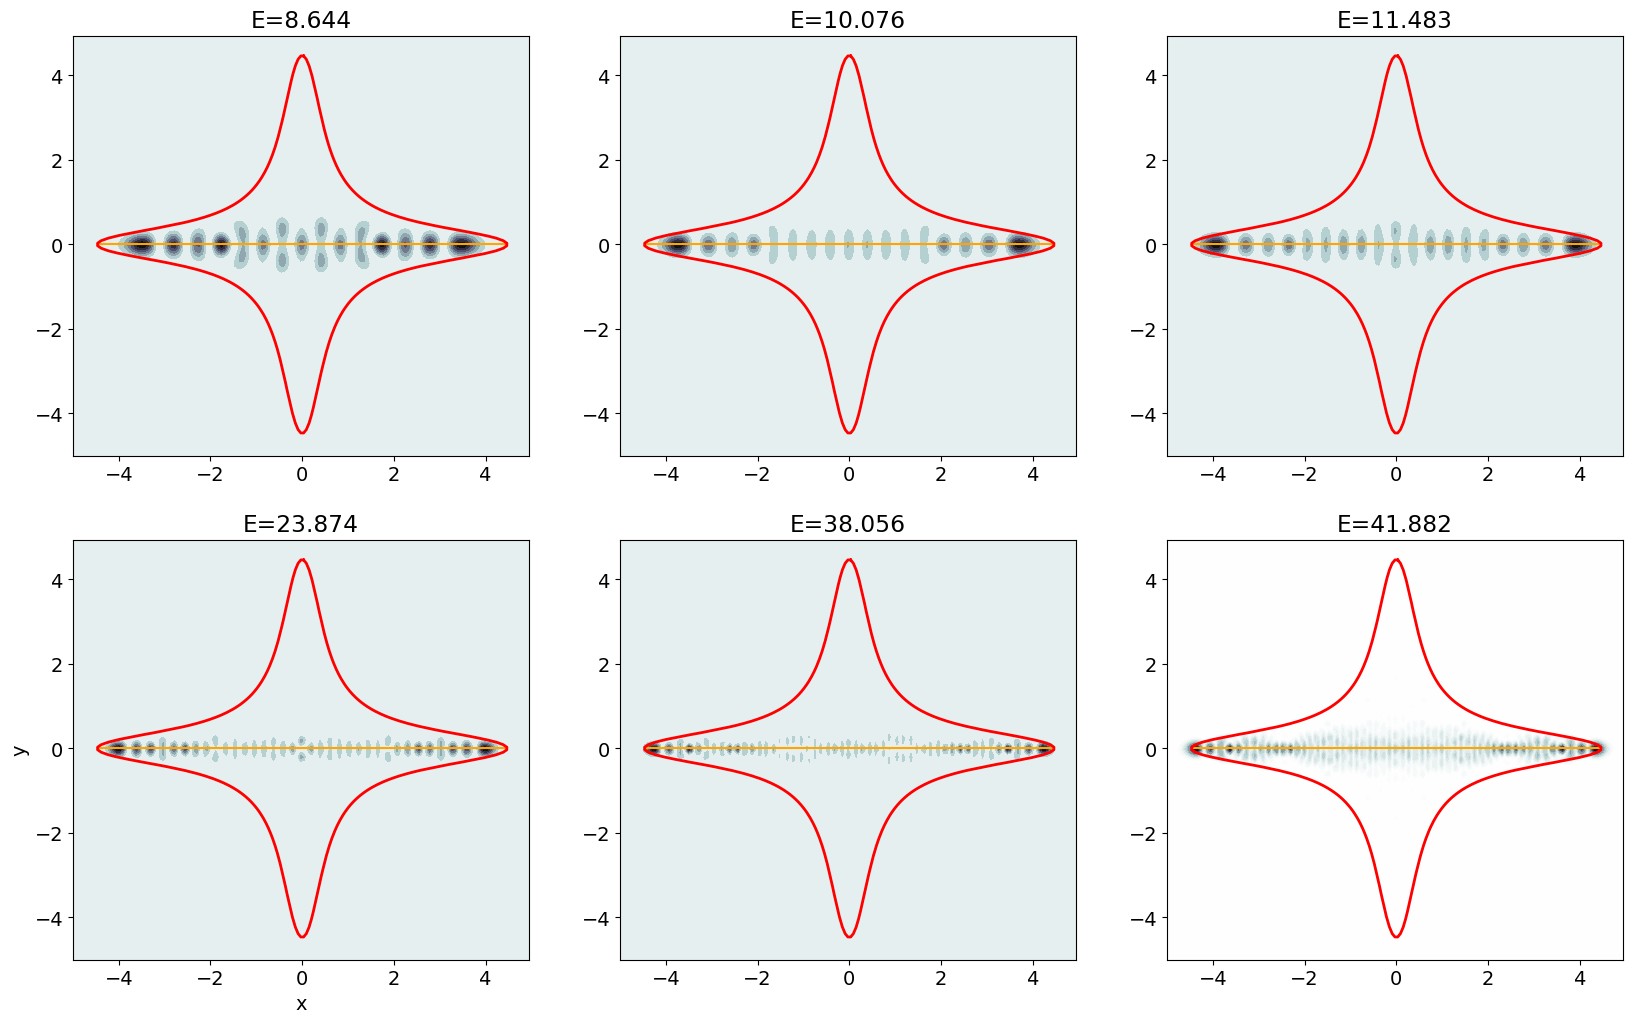

In [19]:
from skimage.measure import find_contours
plt.rcParams.update({'font.size': 14})

row = 2
col= 3


fig, ax = plt.subplots(row, col, figsize=(20,12))

xmin, xmax, ymin, ymax = -5,5,-5,5

phis = [phi_10, phi_15, phi_25, phi_35]
lst = [0,1,2,7,11,13]
l = 0
l2=0
epsilon=0.01
for phi in phis:
    for k in range(phi.shape[0]):
        if l in lst:
            i = int(l2/col)
            j = l2%col

            dx = (xmax - xmin)/phi.shape[1]
            x = np.arange(xmin,xmax, dx)
            y=x
            x_grid, y_grid = np.meshgrid(x, y, copy=False)
            V = 1/2*x_grid**2*y_grid**2 + epsilon/4*(x_grid**4 + y_grid**4)

            C = 1/np.sqrt(np.sum(np.real(phi[k])*np.real(phi[k])*dx*dy))
            phik = C*np.real(phi[k])

            if k<3:
                cb = ax[i][j].contourf(x,y,phik**2/(np.max(phik**2)), cmap=cmap_reversed)
            else:                                                                
                cb = ax[i][j].contourf(x,y,phik**2/(np.max(phik**2)), cmap=cmap_reversed, levels = [0.0,0.01,0.02,0.04,0.05, 0.08, 0.12, 0.16,0.25,
                                                                 0.32, 0.5, 0.64, 0.8,0.9, 1.05])
            #plt.colorbar(cb, ax = ax[i][j])
            ax[i][j].set_title("E={}".format(round(E[l],3)))

            # Contour plot
            contours = find_contours(V, 1)
            for contour in contours:
                Nx = x.shape[0]
                contour = (xmax-xmin)/Nx*contour + xmin
                ax[i][j].plot(contour[:, 1], contour[:, 0], color='red', linewidth=2)
            l2+=1
            hm = np.max(contour[:,1])
            ax[i][j].hlines(y=0, xmin=-hm, xmax=hm,  color='orange')
        l+=1
ax[1][0].set_xlabel('x')
ax[1][0].set_ylabel('y')

plt.show()

Semiclassical energy:  [ 8.813 10.142 11.516 14.389 15.884 17.414 20.577 23.866 25.556 29.019
 34.411 38.13  40.024 41.942 43.881 45.842]
RC energy:  [ 8.644 10.076 11.483 14.306 15.822 17.347 20.614 23.874 25.49  28.953
 34.327 38.056 39.966 41.882 43.84  45.834]
MSE energy: 0.0050


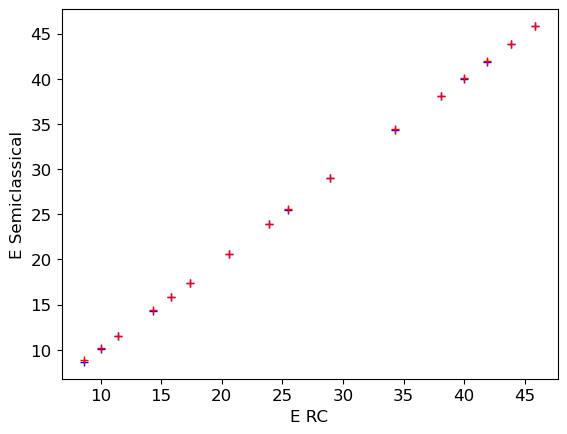

In [20]:
E_semi_hori = np.array([ 8.813, 10.142, 11.516, 14.389, 15.884, 17.414, 20.577, 23.866,
       25.556, 29.019, 34.411, 38.13 , 40.024, 41.942, 43.881, 45.842])
E_true_hori = np.array(E10 + E15+E25+E35)
print('Semiclassical energy: ', E_semi_hori)
print('RC energy: ', E_true_hori)
print('MSE energy: {:.4f}'.format(np.mean(np.square(E_semi_hori - E_true_hori))))
plt.rcParams.update({'font.size': 12})
plt.plot(E_true_hori,E_true_hori, 'b+')
plt.plot(E_true_hori,E_semi_hori, 'r+')
plt.xlabel('E RC')
plt.ylabel('E Semiclassical')
plt.show()

## Quadruple-Loop scar

<img src="images/loop.PNG" alt="Loop scar" width=400>

In [22]:
with open('../results/scars/scars_square_8.npy', 'rb') as f:
            phi_8 = np.load(f)
        
with open('../results/scars/scars_square_10.npy', 'rb') as f:
            phi_10 = np.load(f)
        
with open('../results/scars/scars_square_13.npy', 'rb') as f:
            phi_13 = np.load(f)

with open('../results/scars/scars_square_15.npy', 'rb') as f:
            phi_15 = np.load(f)
        
with open('../results/scars/scars_square_17.npy', 'rb') as f:
            phi_17 = np.load(f)
        
with open('../results/scars/scars_square_21.npy', 'rb') as f:
            phi_21 = np.load(f)
        
with open('../results/scars/scars_square_24.npy', 'rb') as f:
            phi_24 = np.load(f)
        
with open('../results/scars/tube_square.npy', 'rb') as f:
            yy = np.load(f)        
        
E = [7.547,10.575,  12.221, 14.693, 17.675, 20.377, 23.824]

idx = np.argsort(E)
phi = np.vstack([phi_8, phi_10, phi_13, phi_15, phi_17, phi_21, phi_24])
phi = phi[idx]
E = np.array(E)[idx]

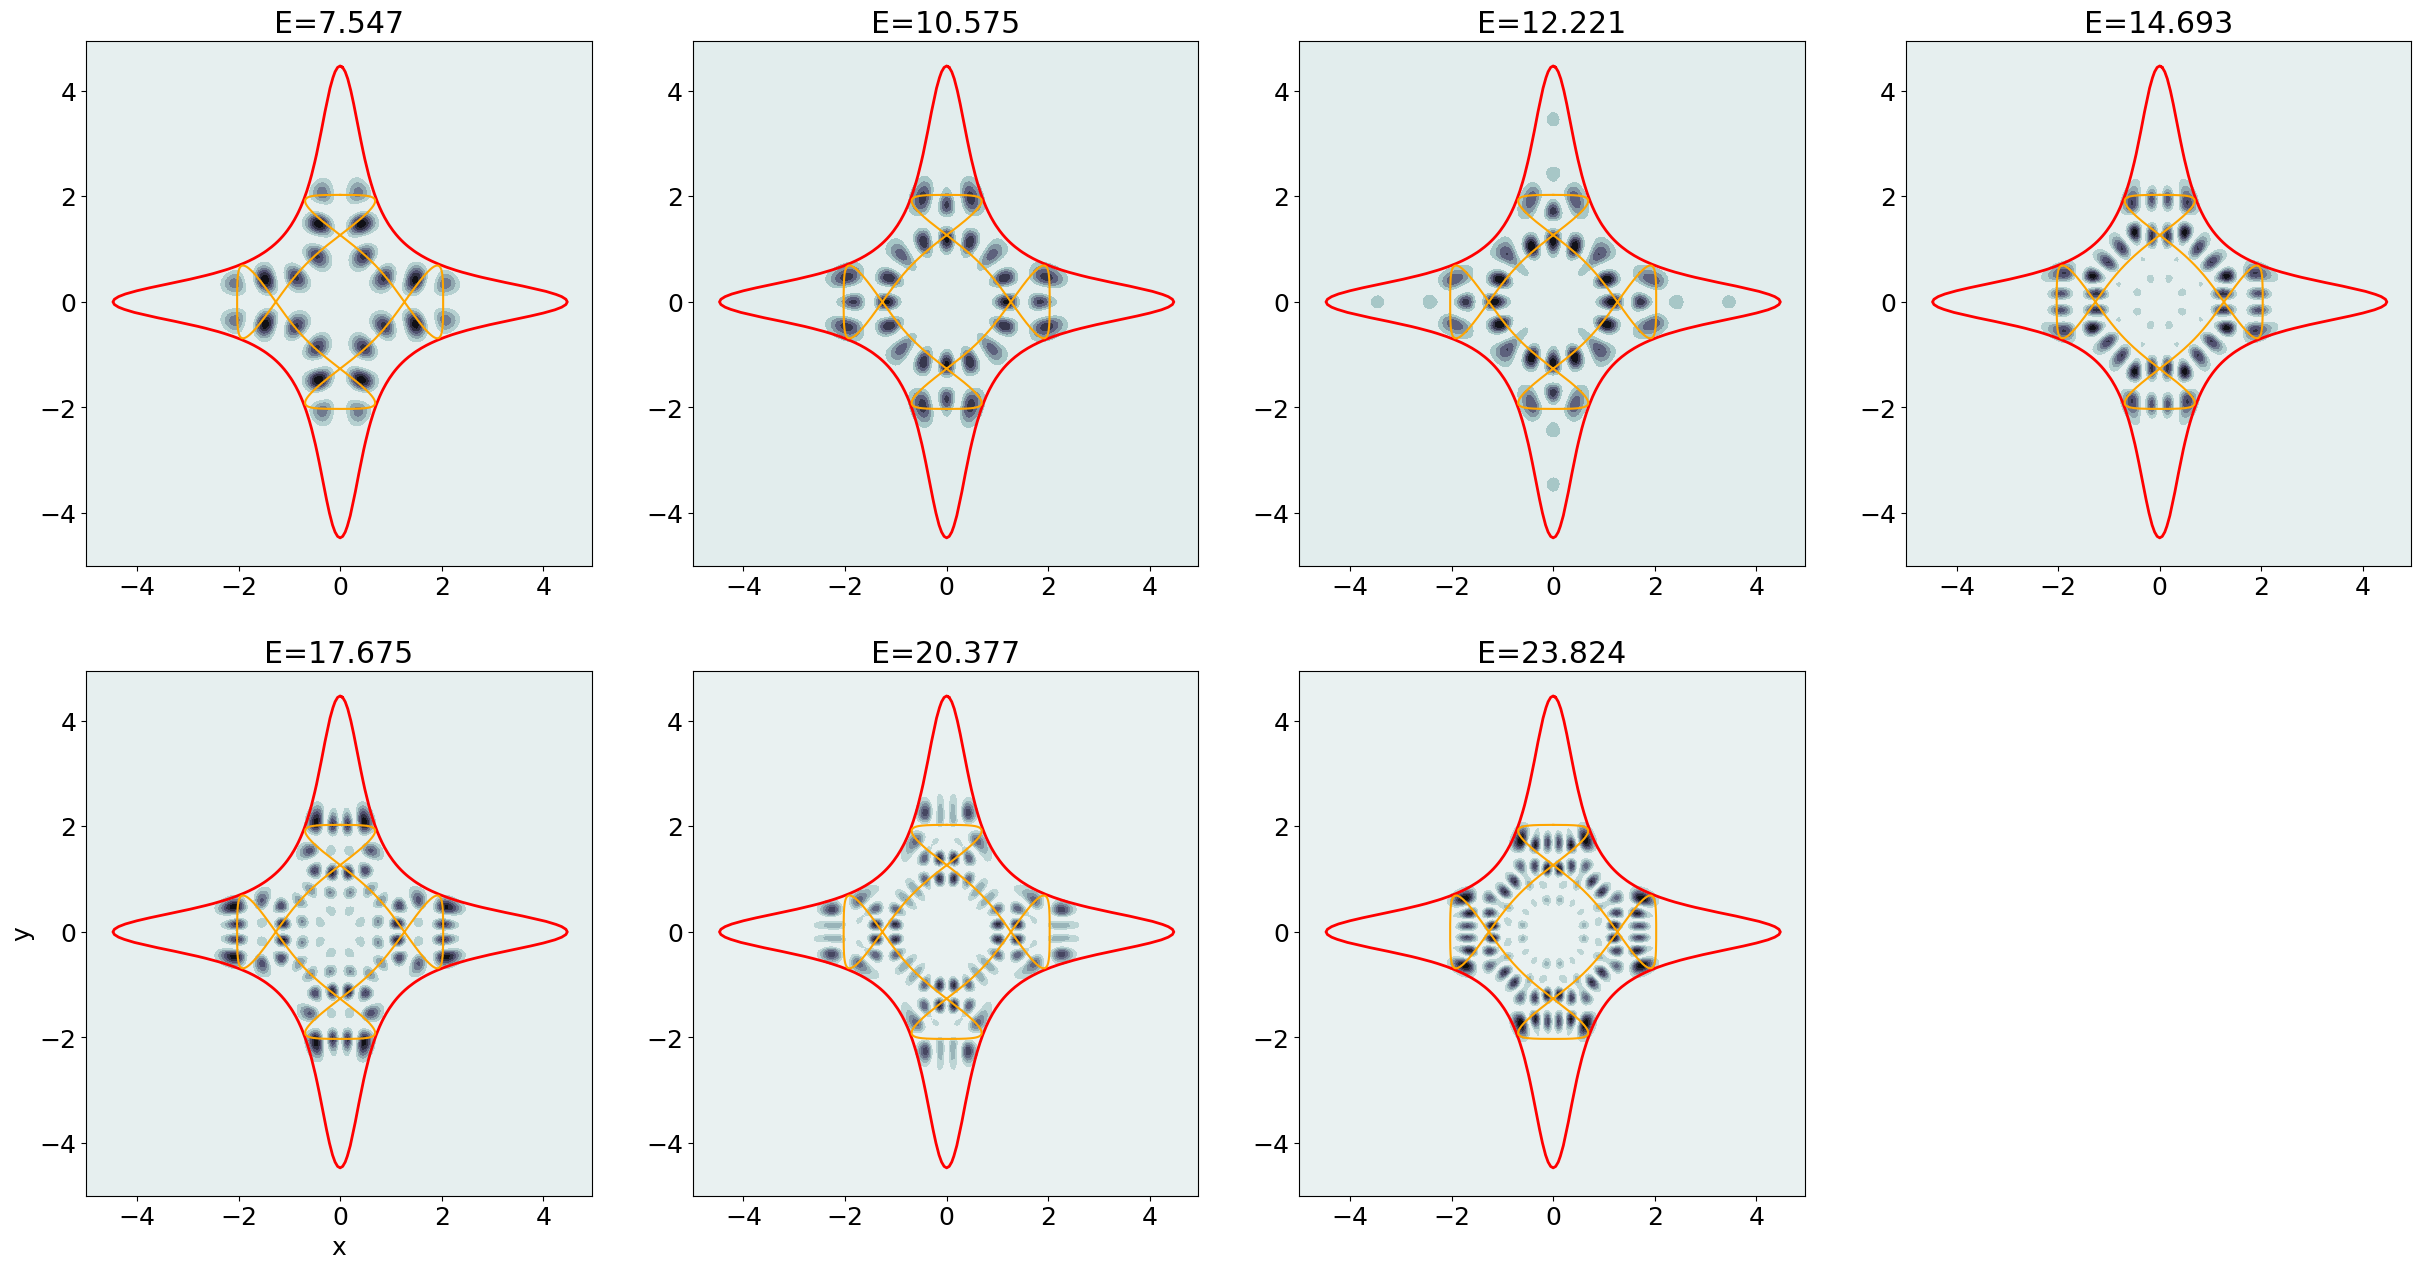

In [23]:
from skimage.measure import find_contours

row = 2
col= 4
plt.rcParams.update({'font.size': 18})

lst = []

fig, ax = plt.subplots(row, col, figsize=(30,15))

xmin, xmax, ymin, ymax = -5,5,-5,5

dx = (xmax - xmin)/phi.shape[1]
x = np.arange(xmin,xmax, dx)
y=x
x_grid, y_grid = np.meshgrid(x, y, copy=False)
V = 1/2*x_grid**2*y_grid**2 + epsilon/4*(x_grid**4 + y_grid**4)

x_orbit = yy[0,:]
y_orbit = yy[1,:]
    
l=0    
for k in range(phi.shape[0]):
    i = int(k/col)
    j = k%col
    
    C = 1/np.sqrt(np.sum(np.real(phi[k])*np.real(phi[k])*dx*dy))
    phik = C*np.real(phi[k])

    C = 1/np.sqrt(np.sum(np.conjugate(phi[k])*phi[k]*dx*dy))
    phi2 = np.real(np.conjugate(C*phi[k])*C*phi[k])

    cb = ax[i][j].contourf(x,y,phik**2, cmap=cmap_reversed)

    #plt.colorbar(cb, ax = ax[i][j])
    ax[i][j].set_title("E={}".format(round(E[k],3)))
    
    # Contour plot
    contours = find_contours(V, 1)
    for contour in contours:
        Nx = x.shape[0]
        contour = (xmax-xmin)/Nx*contour + xmin
        ax[i][j].plot(contour[:, 1], contour[:, 0], color='red', linewidth=2)
    # Plot periodic orbit
    ax[i][j].plot(x_orbit, y_orbit, color='orange')
    l+=1
ax[1][3].remove()
ax[1][0].set_xlabel('x')
ax[1][0].set_ylabel('y')
plt.show()

Semiclassical energy:  [ 8.03926914 10.37167457 12.84389616 15.44166141 18.15386742 20.97158442
 23.88744542]
RC energy:  [ 7.547 10.575 12.221 14.693 17.765 20.377 23.824]
MSE energy: 0.2487


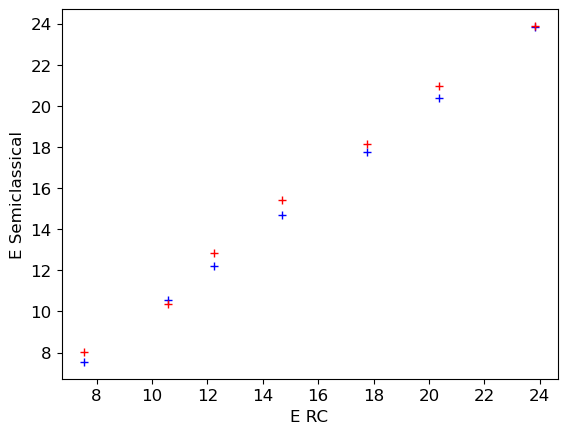

In [24]:
E_true_car = np.array([7.547,10.575,  12.221, 14.693, 17.765, 20.377, 23.824])
E_semi_car = np.array([ 8.03926914, 10.37167457, 12.84389616, 15.44166141, 18.15386742, 20.97158442, 23.88744542])
print('Semiclassical energy: ', E_semi_car)
print('RC energy: ', E_true_car)
print('MSE energy: {:.4f}'.format(np.mean(np.square(E_semi_car - E_true_car))))
plt.rcParams.update({'font.size': 12})
plt.plot(E_true_car,E_true_car, 'b+')
plt.plot(E_true_car,E_semi_car, 'r+')
plt.xlabel('E RC')
plt.ylabel('E Semiclassical')
plt.show()

## Square scar

<img src="images/square.PNG" alt="Square scar" width=400>

In [25]:
with open('../results/scars/scars_square_15.npy', 'rb') as f:
            phi_15 = np.load(f)
        
with open('../results/scars/scars_square_22b.npy', 'rb') as f:
            phi_22 = np.load(f)
        
with open('../results/scars/scars_square_29.npy', 'rb') as f:
            phi_29 = np.load(f)

with open('../results/scars/scars_square_37.npy', 'rb') as f:
            phi_37 = np.load(f)
        
with open('../results/scars/scars_square_45.npy', 'rb') as f:
            phi_45 = np.load(f)
        
with open('../results/scars/scars_square_53.npy', 'rb') as f:
            phi_53 = np.load(f)
        
E = [15.78, 22.358,29.112,37.277,45.316,53.922]
        
with open('../results/scars/tube_sq.npy', 'rb') as f:
            yy = np.load(f)        
        
idx = np.argsort(E)
phi = np.vstack([phi_15, phi_22.reshape(1,200,200), phi_29.reshape(1,200,200),
                 phi_37.reshape(1,200,200), phi_45.reshape(1,200,200), phi_53])
phi = phi[idx]
E = np.array(E)[idx]

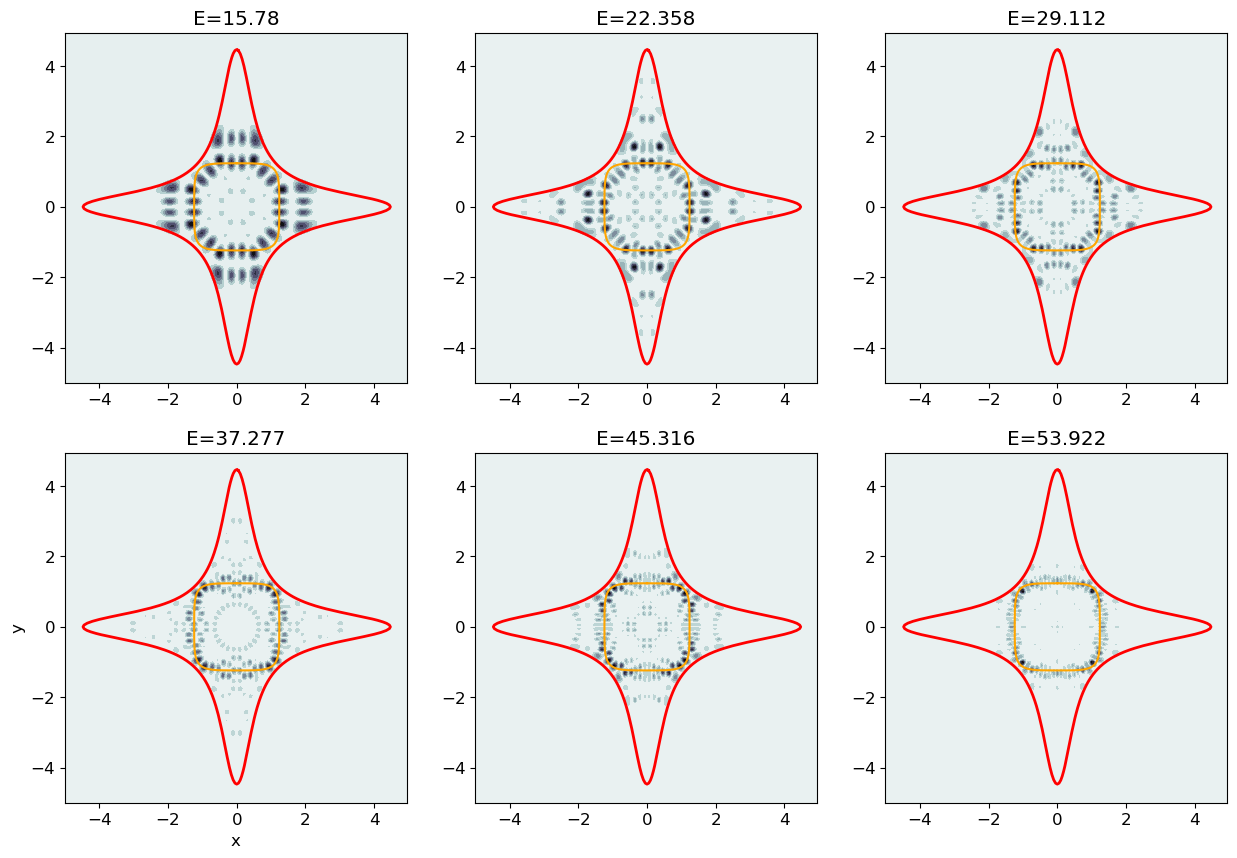

In [26]:
from skimage.measure import find_contours

row = 2
col= 3

fig, ax = plt.subplots(row, col, figsize=(15,10))

xmin, xmax, ymin, ymax = -5,5,-5,5

dx = (xmax - xmin)/phi.shape[1]
x = np.arange(xmin,xmax, dx)
y=x
x_grid, y_grid = np.meshgrid(x, y, copy=False)
V = 1/2*x_grid**2*y_grid**2 + epsilon/4*(x_grid**4 + y_grid**4)
x_orbit = yy[0,:]
y_orbit = yy[1,:]

l=0    
for k in range(phi.shape[0]):
    i = int(k/col)
    j = k%col
    
    C = 1/np.sqrt(np.sum(np.real(phi[k])*np.real(phi[k])*dx*dy))
    phik = C*np.real(phi[k])

    cb = ax[i][j].contourf(x,y,phik**2, cmap=cmap_reversed)

    #plt.colorbar(cb, ax = ax[i][j])
    ax[i][j].set_title("E={}".format(round(E[k],3)))

    # Contour plot
    contours = find_contours(V, 1)
    for contour in contours:
        Nx = x.shape[0]
        contour = (xmax-xmin)/Nx*contour + xmin
        ax[i][j].plot(contour[:, 1], contour[:, 0], color='red', linewidth=2)
    # Plot periodic orbit
    ax[i][j].plot(x_orbit, y_orbit, color='orange')
    l+=1
ax[1][0].set_xlabel('x')
ax[1][0].set_ylabel('y')
plt.show()

Semiclassical energy:  [15.78  22.358 29.112 37.277 45.316]
RC energy:  [15.49663979 22.16043581 29.37235678 37.05951631 45.1693387 ]
MSE energy: 0.0512


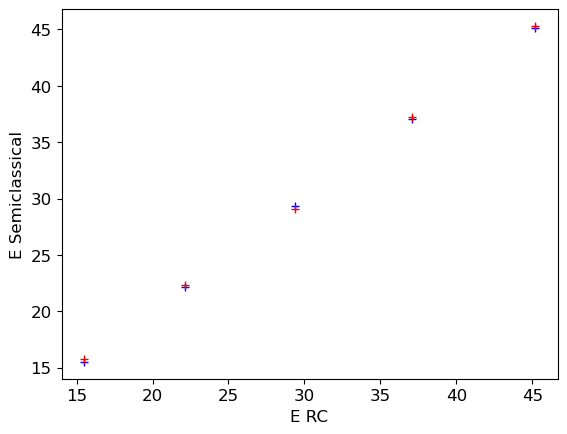

In [27]:
E_true_square = np.array([ 15.49663979, 22.16043581, 29.37235678, 37.05951631, 45.1693387])
E_semi_square = np.array([15.78, 22.358,29.112,37.277,45.316])
print('Semiclassical energy: ', E_semi_square)
print('RC energy: ', E_true_square)
print('MSE energy: {:.4f}'.format(np.mean(np.square(E_semi_square - E_true_square))))
plt.rcParams.update({'font.size': 12})
plt.plot(E_true_square,E_true_square, 'b+')
plt.plot(E_true_square,E_semi_square, 'r+')
plt.xlabel('E RC')
plt.ylabel('E Semiclassical')
plt.show()

## Triangle scar

<img src="images/triangle.PNG" alt="Square scar" width=400>

In [28]:
with open('../results/scars/scars_triag_55.npy', 'rb') as f:
            phi_55 = np.load(f)
        
with open('../results/scars/scars_triag_62.npy', 'rb') as f:
            phi_62 = np.load(f)
        
with open('../results/scars/scars_triag_70.npy', 'rb') as f:
            phi_70 = np.load(f)

E = [55.876, 62.611, 70.411]
        
with open('../results/scars/tube_triangle.npy', 'rb') as f:
            yy = np.load(f)        
with open('../results/scars/tube_triangle2.npy', 'rb') as f:
            yy2 = np.load(f)      
        
idx = np.argsort(E)
phi = np.vstack([phi_55, phi_62, phi_70])
phi = phi[idx]
E = np.array(E)[idx]

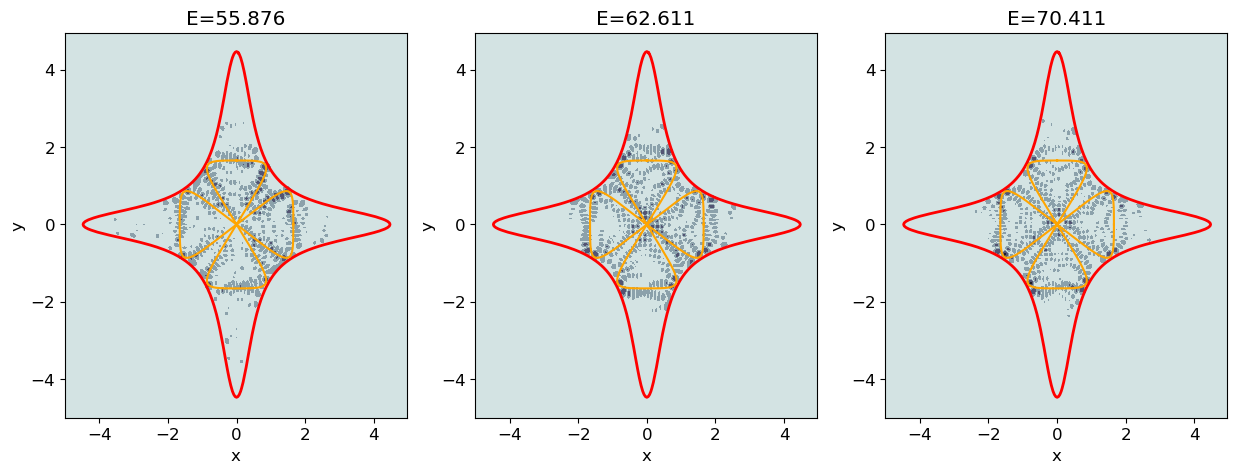

In [29]:
from skimage.measure import find_contours

row = 1
col= 3

fig, ax = plt.subplots(row, col, figsize=(15,5))

xmin, xmax, ymin, ymax = -14.547391000392476, 14.431011872389131,-14.547391000392476, 14.431011872389131
xmin, xmax, ymin, ymax =-5,5,-5,5
dx = (xmax - xmin)/phi.shape[1]
x = np.arange(xmin,xmax, dx)
y=x
x_grid, y_grid = np.meshgrid(x, y, copy=False)
V = 1/2*x_grid**2*y_grid**2 + epsilon/4*(x_grid**4 + y_grid**4)
x_orbit = yy[0,:]
y_orbit = yy[1,:]
x_orbit2 = yy2[0,:]
y_orbit2 = yy2[1,:]


l=0    
levels_list = [np.arange(0,0.36,0.08),np.arange(0,0.36,0.085),np.arange(0,0.36,0.085)]

for k in range(phi.shape[0]):
    i = int(k/col)
    j = k%col
    phik = np.real(phi[k])
    phik2 = np.real(np.conjugate(phi[k])*phi[k])
    phik3 = np.abs(np.real(phi[k]))
    phik3[phik3<1e-6] = 0
    cb = ax[j].contourf(x,y,phik3,cmap=cmap_reversed, levels = levels_list[k])

    #plt.colorbar(cb, ax = ax[j])
    ax[j].set_title("E={}".format(round(E[k],3)))
    ax[j].set_xlabel('x')
    ax[j].set_ylabel('y')
    # Contour plot
    contours = find_contours(V, 1)
    for contour in contours:
        Nx = x.shape[0]
        contour = (xmax-xmin)/Nx*contour + xmin
        ax[j].plot(contour[:, 1], contour[:, 0], color='red', linewidth=2)
    # Plot periodic orbit
    eta = E[k]**(1/4)
    ax[j].plot(x_orbit, y_orbit, color='orange')
    ax[j].plot(x_orbit2, y_orbit2, color='orange')
    l+=1

plt.show()

Semiclassical energy:  [55.242 62.542 70.062]
RC energy:  [55.876 62.611 70.411]
MSE energy: 0.1762


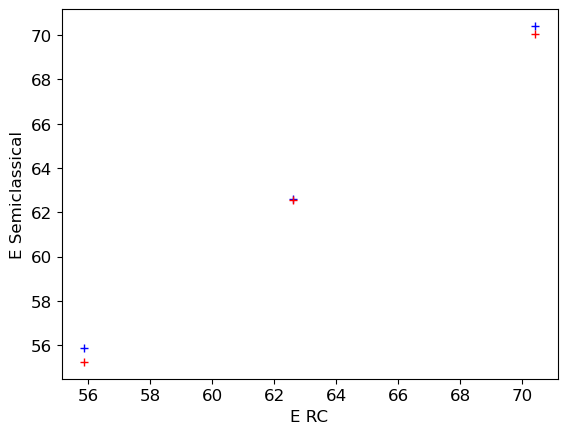

In [30]:
E_true_triangle = np.array([55.876, 62.611, 70.411])
E_semi_triangle = np.array([55.242, 62.542, 70.062])
print('Semiclassical energy: ', E_semi_triangle)
print('RC energy: ', E_true_triangle)
print('MSE energy: {:.4f}'.format(np.mean(np.square(E_semi_triangle - E_true_triangle))))
plt.rcParams.update({'font.size': 12})
plt.plot(E_true_triangle,E_true_triangle, 'b+')
plt.plot(E_true_triangle,E_semi_triangle, 'r+')
plt.xlabel('E RC')
plt.ylabel('E Semiclassical')
plt.show()

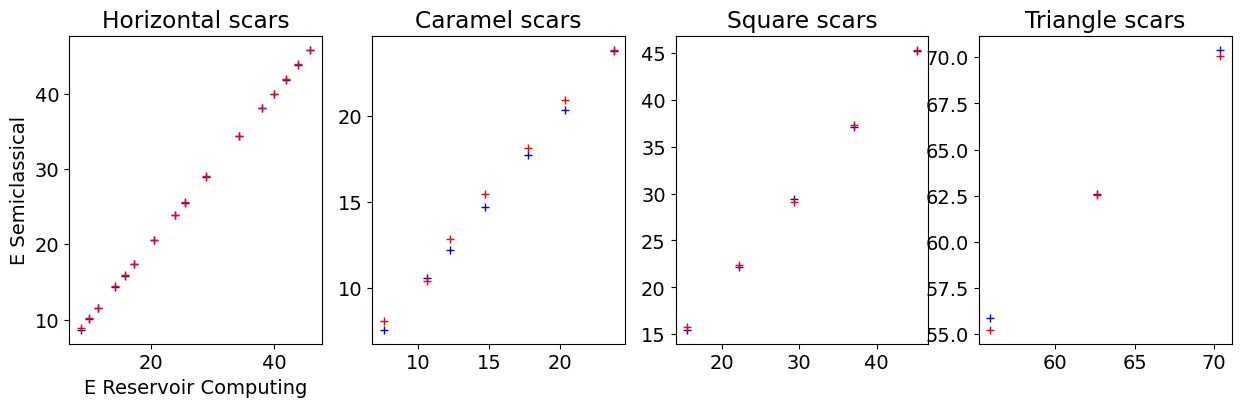

In [31]:
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(1, 4, figsize=(15,4))
ax[0].plot(E_true_hori,E_true_hori, 'b+')
ax[0].plot(E_true_hori,E_semi_hori, 'r+')
ax[0].set_xlabel('E Reservoir Computing')
ax[0].set_ylabel('E Semiclassical')
ax[0].set_title('Horizontal scars')

ax[1].plot(E_true_car,E_true_car, 'b+')
ax[1].plot(E_true_car,E_semi_car, 'r+')
ax[1].set_title('Caramel scars')

ax[2].plot(E_true_square,E_true_square, 'b+')
ax[2].plot(E_true_square,E_semi_square, 'r+')
ax[2].set_title('Square scars')

ax[3].plot(E_true_triangle,E_true_triangle, 'b+')
ax[3].plot(E_true_triangle,E_semi_triangle, 'r+')
ax[3].set_title('Triangle scars')

plt.show()